In [53]:
import numpy as np 
import pandas as pd
import random
from scipy.stats import mode


%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns

In [168]:
# Генерация фиктивных данных
np.random.seed(42)
random.seed(42)

# параметры для создание датафрейма
citys = ['London', 'New York', 'Sydney', 'Tokyo', 'Paris']
category = ['A', 'B', 'C']
k = 500

# Создание датафрейма
data = {
    'City': random.choices(citys, k=k) ,
    'Year': random.choices(range(2010, 2021), k=k),
    'Sales': np.random.randint(1000, 10000, size=k),
    'Profit': np.random.uniform(0, 5000, size=k),
    'Category': random.choices(category, k=k)
}

df = pd.DataFrame(data)
df["Year"] =  pd.to_datetime(df["Year"], format='ISO8601')
df.head(5)

,City,Year,Sales,Profit,Category
0,Tokyo,2016-01-01,8270,3440.150051,A
1,London,2010-01-01,1860,4184.819371,C
2,New York,2014-01-01,6390,4334.343527,B
3,New York,2016-01-01,6191,4192.403819,C
4,Tokyo,2010-01-01,6734,2130.457375,B


# Zadania do wizualizacji

##  Wyświetl histogram sprzedaży według miasta.
Отобразить гистограмму продаж по городам.

In [108]:
sales_by_sity[sales_by_sity == np.median(sales_by_sity)].index

Index(['Tokyo'], dtype='object', name='City')

C:\Users\user\AppData\Local\Temp\ipykernel_5344\551980419.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ax.vlines(mode(sales_by_sity)[1], 0, np.max(sales_by_sity),


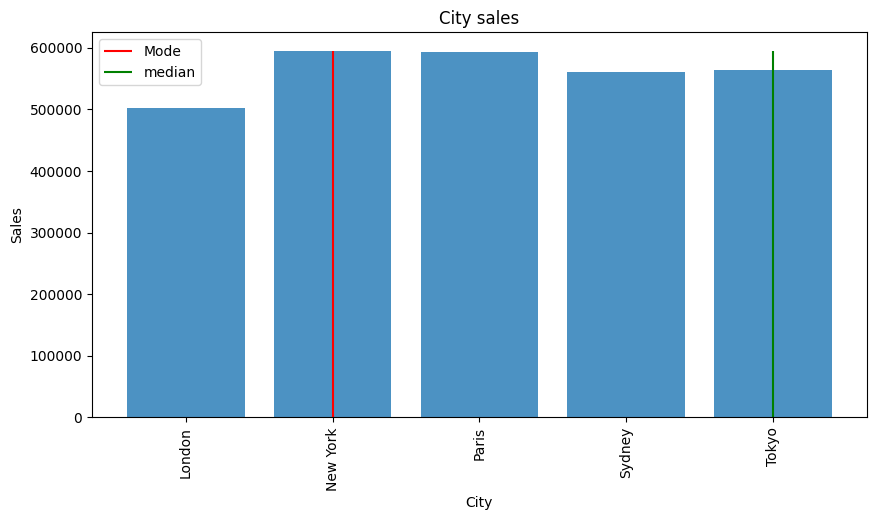

In [112]:
sales_by_sity = df.groupby("City", as_index = True).Sales.sum()

fig, ax = plt.subplots(figsize= (10,5))

ax.bar(sales_by_sity.index, sales_by_sity, alpha = .8)
ax.vlines(mode(sales_by_sity)[1], 0, np.max(sales_by_sity), 
          color = "r", label = "Mode")
ax.vlines( sales_by_sity[sales_by_sity == np.median(sales_by_sity)].index,
          0, np.max(sales_by_sity), color = "g", label = "Median")

ax.legend()
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("City sales")
plt.xticks(rotation = 90)
plt.show();

In [42]:
# citys = ['London', 'New York', 'Sydney', 'Tokyo', 'Paris']
# data = pd.DataFrame()
# for city in citys:
#     data[city] = df.loc[df["City"] == city, "Sales"].reset_index(drop =True)
    
# fig, ax = plt.subplots(data.shape[1], figsize= (5,15))

# for i, cyty in enumerate(citys):
#     ax[i].hist(data[cyty], label= cyty)
#     ax[i].set_title(f'Sales Distribution in {city}') # isprawlienie
#     ax[i].legend()
# plt.show()

##  Zbuduj wykres słupkowy zarobków według roku.
Построить столбчатую диаграмму прибыли по годам.


In [113]:
df.head(1)

,City,Year,Sales,Profit,Category
0,Tokyo,2016-01-01,8270,3440.150051,A


C:\Users\user\AppData\Local\Temp\ipykernel_5344\397957884.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ax.vlines(mode(profit_by_city)[1], 0, np.max(profit_by_city),


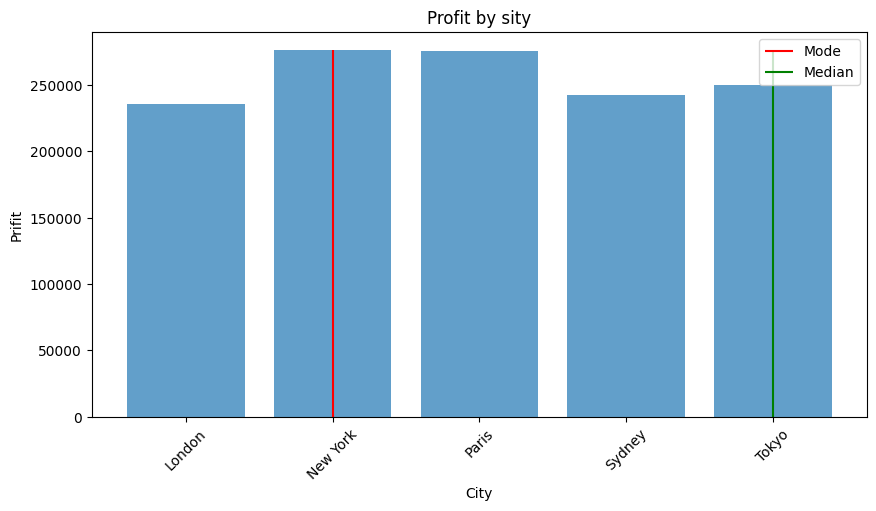

In [131]:
profit_by_city = df.groupby("City", as_index= True).Profit.sum()

fig, ax = plt.subplots(figsize= (10,5))

ax.bar(profit_by_city.index, profit_by_city, alpha= .7)
ax.vlines(mode(profit_by_city)[1], 0, np.max(profit_by_city), 
          label= "Mode", color= "r")

med = np.median(profit_by_city)
ax.vlines(profit_by_city[profit_by_city == med].index, 0, np.max(profit_by_city),
          label= "Median", color= "g")

ax.legend()

plt.title("Profit by sity")
plt.xlabel("City")
plt.ylabel("Prifit")
plt.xticks(rotation= 45)

plt.show()


##  Utwórz horroplet, aby zwizualizować sprzedaż według miasta.
Создать хороплетную карту для визуализации продаж по городам.


##  Zbadaj sezonowość sprzedaży według miesięcy i przedstaw ją na wykresie.
Изучить сезонность продаж по месяцам и представить ее на графике.


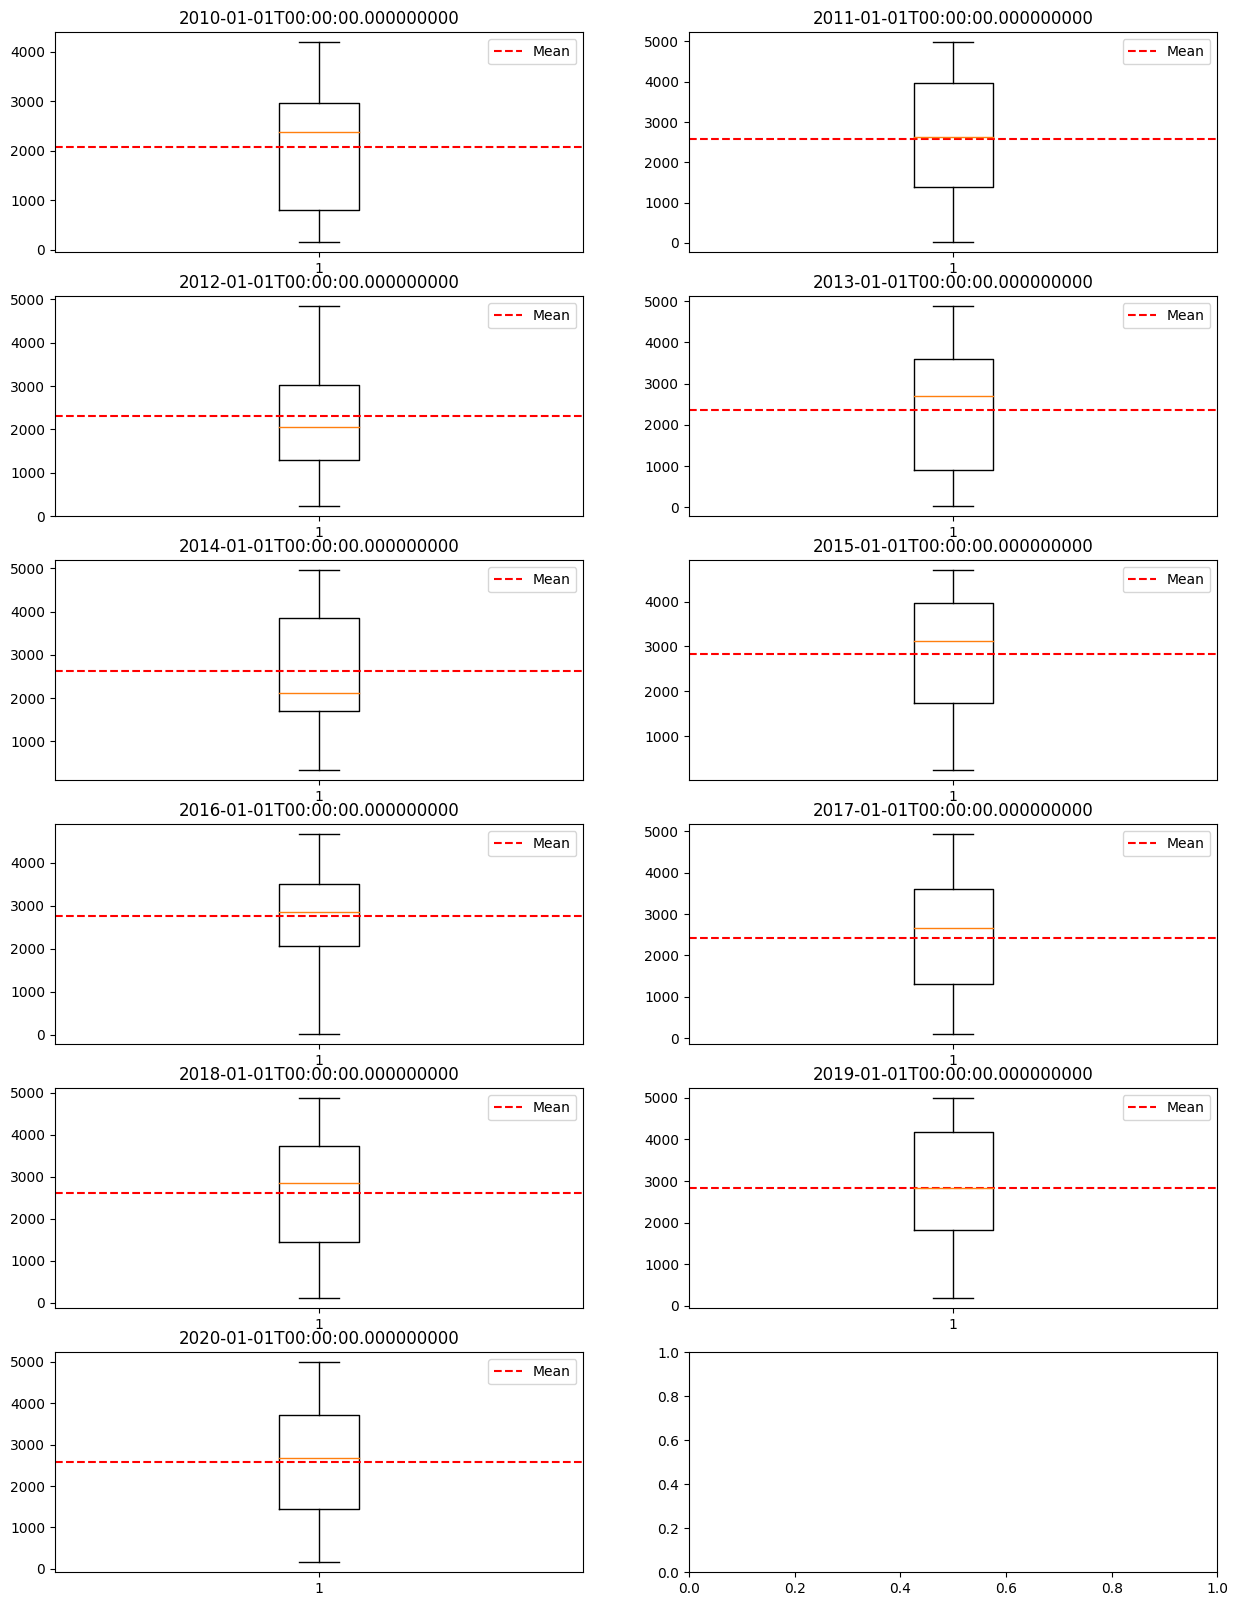

In [192]:
years = sorted(list(pd.unique(df.Year)))
data = pd.DataFrame()
for year in years:
    data[year] = df.loc[df["Year"] == year, "Sales"].reset_index(drop =True)
    
data.fillna(0, inplace = True)

num_years = len(years)
num_rows = (num_years + 1) // 2
num_cols = 2

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 20))

for i, year in enumerate(years):
    row = i // num_cols
    col = i % num_cols
    ax[row, col].boxplot(data[year])
    ax[row, col].set_title(str(year))
    ax[row, col].axhline(np.mean(data[year]), color='red', linestyle='--', label='Mean')
    
    ax[row, col].legend()

plt.show()

##  Zbuduj wykres kołowy, aby pokazać proporcje kategorii produktów.
Построить круговую диаграмму для отображения доли категорий продуктов.

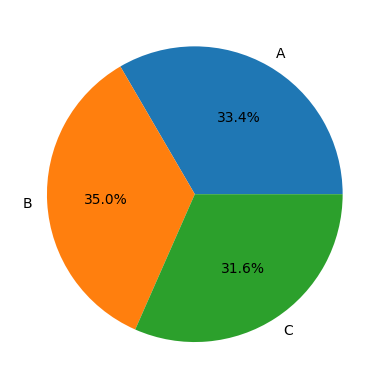

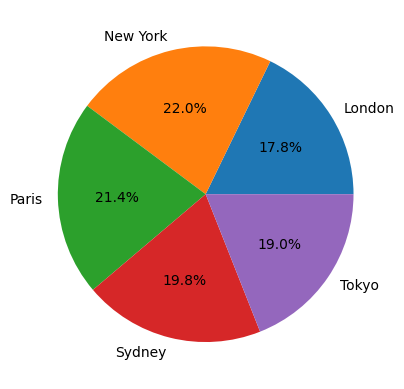

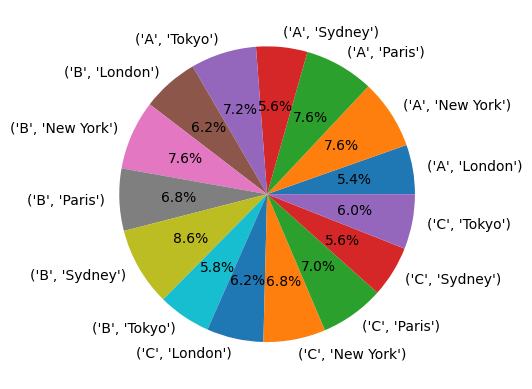

In [206]:
data_cat = df.groupby("Category", as_index= True).count()
data_city = df.groupby("City", as_index= True).count()
oll_data = df.groupby(["Category","City"], as_index= True).count()

data

for i in (data_cat, data_city, oll_data):
    fig, ax = plt.subplots()
    ax.pie(i["Profit"], labels= i.index,  autopct='%1.1f%%' )

    plt.show()

Построить линейный график для отслеживания динамики продаж по годам для каждого города.

Создать ящик с усами (box plot) для сравнения распределения прибыли по категориям продуктов.

Построить scatter plot, чтобы исследовать связь между продажами и прибылью для каждого города.

Построить столбчатую диаграмму для отображения суммарных продаж по категориям продуктов.

Создать столбчатую диаграмму, чтобы сравнить продажи по городам для выбранного года.

Построить линейный график для отслеживания изменения прибыли в течение времени для выбранного города.

Создать круговую диаграмму для отображения доли каждого города в общих продажах.